## Project Details
Your tasks in this project are as follows:

 - Data wrangling, which consists of:
   - Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
   - Assessing data
   - Cleaning data
 - Storing, analyzing, and visualizing your wrangled data
 - Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations
 
### Gathering Data for this Project
Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

  1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

  2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

  3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.
  
### Assessing Data for this Project
After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least **eight (8) quality issues** and **two (2) tidiness issues** in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

### Cleaning Data for this Project
Clean each of the issues you documented while assessing. Perform this cleaning in wrangle_act.ipynb as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.

### Storing, Analyzing, and Visualizing Data for this Project
Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

### Deliverables
Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least **three (3) insights and one (1) visualization** must be produced.

Create a **300-600 word written report** called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.

Create a **250-word-minimum written report** called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

In [1]:
import pandas as pd
import numpy as np
import requests as req
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

### Gathering Data

#### 1. Gather data from twitter_archive_enhanced.csv

In [2]:
df_twi_enhan = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_twi_enhan.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Gather data from image_predictions.tsv

In [4]:
request = req.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [5]:
tweet_image = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [6]:
df_breed = pd.read_csv(tweet_image, sep = '\t')

In [7]:
df_breed.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. df_tweets Dataset

In [8]:
consumer_key = "ZXva16viOadGQTBT0cTTHiWGO"
consumer_secret = "RrKjXya8UZfsYXKuzxL4kHPkRsrFItpzjNdcoigxSqH3tqA6wQ"
access_token = '1144286188435628034-S0sHyd2tvOfetHUt0D6ZCS9KyazM1S'
access_secret = '3Ks3EWUXHXyzlPtOZiRKGtTUGSTs6USd3Mmmp0AaetJYc'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
id_list = df_twi_enhan['tweet_id']

In [10]:
id_list

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888202515573088257
20      888078434458587136
21      887705289381826560
22      887517139158093824
23      887473957103951883
24      887343217045368832
25      887101392804085760
26      886983233522544640
27      886736880519319552
28      886680336477933568
29      886366144734445568
               ...        
2326    666411507551481857
2327    666407126856765440
2328    666396247373291520
2329    666373753744588802
2330    666362758909284353
2331    666353288456101888
2

In [11]:
# creating a list for the exceptions
exceptions_list = []


with open('tweet_json.txt', 'w', encoding = 'utf-8') as f:
    for id_tweet in id_list: 
        try:
            tweet = api.get_status(id_tweet, tweet_mode= 'extended')
            json.dump(tweet._json, f)

            f.write("\n")
        except Exception as e:
            exceptions_list.append(id_tweet)
# printing out the exception messages
            print(str(e))

[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'mess

In [12]:
df_json_tweets = pd.read_json('tweet_json.txt', orient='records', lines = True)

In [13]:
df_tweets = df_json_tweets[['id','favorite_count', 'retweet_count', 'retweeted']]

In [14]:
df_tweets.head()

,id,favorite_count,retweet_count,retweeted
0,892420643555336193,37353,8016,False
1,892177421306343426,32098,5945,False
2,891815181378084864,24197,3932,False
3,891689557279858688,40642,8175,False
4,891327558926688256,38875,8853,False


### Assessing Data

#### 1. twitter_archive_enhanced Dataset

In [15]:
df_twi_enhan

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [16]:
df_twi_enhan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
df_twi_enhan.shape

(2356, 17)

##### 1.1. Check if there are any duplicated id.

In [18]:
df_twi_enhan[df_twi_enhan['tweet_id'].duplicated(keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### 1.2 Check if there are any misinterpreted info in the dataset.
Results show that name start with lowercase letter are all invaid name.

In [19]:
df_twi_enhan.groupby('name')['name'].size()

name
Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old    

#### 2. image_predictions Dataset

In [20]:
df_breed

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [21]:
df_breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_breed.shape

(2075, 12)

##### 2.1. Check if there are any null values.

In [23]:
df_breed.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

#### 3. df_tweets Dataset

In [24]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 4 columns):
id                2333 non-null int64
favorite_count    2333 non-null int64
retweet_count     2333 non-null int64
retweeted         2333 non-null bool
dtypes: bool(1), int64(3)
memory usage: 57.0 KB


In [25]:
df_tweets.shape

(2333, 4)

In [26]:
df_tweets

,id,favorite_count,retweet_count,retweeted
0,892420643555336193,37353,8016,False
1,892177421306343426,32098,5945,False
2,891815181378084864,24197,3932,False
3,891689557279858688,40642,8175,False
4,891327558926688256,38875,8853,False
5,891087950875897856,19541,2948,False
6,890971913173991426,11407,1949,False
7,890729181411237888,62957,17861,False
8,890609185150312448,26877,4048,False
9,890240255349198849,30807,6974,False


##### 3.1. Check if there are any retweeted values.

In [27]:
len(df_tweets.query('retweeted == True'))

0

##### 3.2. Check if there are any duplicated id.

In [28]:
df_tweets[df_tweets['id'].duplicated(keep=False)]

,id,favorite_count,retweet_count,retweeted


#### Conclusion

**Quality:**
1. df_twi_enhan contains retweets, where retweeted_status_id has a number instead of NaN.
2. "Timestamp is a string" is a wrong datatype.
3. Dogs'name start with lowercase letter which are invaid infomation, ex. "a", "actually", "all", etc.
4. doggo, floofer, pupper, and puppo are using the string "None" instead of NaN
5. tweet_id, in_reply_to_status_id, in_reply_to_user_id should be changed to string.
6. Rating scale is not accurate.
7. df_breed dataset contains data not related to dogs.
8. The p1, p2, and p3 contents are not consistent, some are capitalized, some contain underscores.




**Tidiness:**
9. Some info are not useful, such as source column in df_twi_enhan table and img_num in df_breed table.
10. There are three seperate data sources instead of one gaint table, since they all talking about the same tweet.
11. doggo, floofer, pupper, and puppo are all talking about dogs characteristics, can combine them into one column, and drop them afterall.

### Cleaning Data

In [29]:
df_twi_enhan_clean = df_twi_enhan.copy()
df_breed_clean = df_breed.copy()
df_tweets_clean = df_tweets.copy()

#### 1. Drop duplicated data and retweets data

In [30]:
df_twi_enhan.drop_duplicates()
df_breed.drop_duplicates()
df_tweets.drop_duplicates()

,id,favorite_count,retweet_count,retweeted
0,892420643555336193,37353,8016,False
1,892177421306343426,32098,5945,False
2,891815181378084864,24197,3932,False
3,891689557279858688,40642,8175,False
4,891327558926688256,38875,8853,False
5,891087950875897856,19541,2948,False
6,890971913173991426,11407,1949,False
7,890729181411237888,62957,17861,False
8,890609185150312448,26877,4048,False
9,890240255349198849,30807,6974,False


In [31]:
df_twi_enhan.drop(['retweeted_status_user_id','retweeted_status_id','retweeted_status_timestamp'], axis=1,inplace=True)

In [32]:
df_twi_enhan.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Datatype - Timestamp

In [33]:
# Remove the time zone information from 'timestamp' column
df_twi_enhan['timestamp'] = df_twi_enhan['timestamp'].str.slice(start=0, stop=-6)

In [34]:
df_twi_enhan['timestamp'] = pd.to_datetime(df_twi_enhan['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [35]:
df_twi_enhan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null datetime64[ns]
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 257.8+ KB


In [36]:
df_twi_enhan.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### 3. Inaccurate name (ex. dogs'name)

In [37]:
lowercase_names = []
for row in df_twi_enhan['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [38]:
df_twi_enhan['name'].replace(lowercase_names, 
                        np.NaN,
                       inplace = True)

In [39]:
df_twi_enhan['name'].replace('None', 
                        np.NaN,
                       inplace = True)

In [40]:
df_twi_enhan['name'].value_counts()

Charlie      12
Cooper       11
Lucy         11
Oliver       11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
Sadie         8
Bailey        7
Buddy         7
Toby          7
Daisy         7
Rusty         6
Leo           6
Jax           6
Scout         6
Jack          6
Stanley       6
Oscar         6
Milo          6
Dave          6
Bella         6
Koda          6
Chester       5
Louis         5
Oakley        5
Sunny         5
Larry         5
             ..
Willem        1
Tuco          1
Clifford      1
Smiley        1
Lupe          1
Bode          1
Beya          1
Holly         1
General       1
Snoopy        1
Jaspers       1
Jarod         1
Jaycob        1
Major         1
Sprinkles     1
Gunner        1
Snoop         1
Horace        1
Wesley        1
Skye          1
Millie        1
Brutus        1
Tiger         1
Ronduh        1
Goliath       1
Jordy         1
Sojourner     1
Clarkus       1
Tobi          1
Pluto         1
Name: name, Length: 931,

#### 4&11. Dogs' characteristics 

In [41]:
df_twi_enhan['dog_charac'] = df_twi_enhan['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [42]:
df_twi_enhan[['dog_charac','doggo', 'floofer', 'pupper', 'puppo']]

,dog_charac,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


In [43]:
df_twi_enhan = df_twi_enhan.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [44]:
df_twi_enhan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null datetime64[ns]
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     1502 non-null object
dog_charac               399 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 202.5+ KB


In [45]:
df_twi_enhan.shape

(2356, 11)

#### 5. Datatype - in_reply_to_status_id / in_reply_to_user_id / tweet_id

In [46]:
df_twi_enhan['in_reply_to_status_id'] = df_twi_enhan['in_reply_to_status_id'].astype(str)

In [47]:
df_twi_enhan['in_reply_to_user_id'] = df_twi_enhan['in_reply_to_user_id'].astype(str)

In [48]:
df_twi_enhan['tweet_id'] = df_twi_enhan['tweet_id'].astype(str)

In [49]:
df_twi_enhan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2356 non-null object
in_reply_to_status_id    2356 non-null object
in_reply_to_user_id      2356 non-null object
timestamp                2356 non-null datetime64[ns]
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     1502 non-null object
dog_charac               399 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 202.5+ KB


In [50]:
df_tweets['id'] = df_tweets['id'].astype(str)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 4 columns):
id                2333 non-null object
favorite_count    2333 non-null int64
retweet_count     2333 non-null int64
retweeted         2333 non-null bool
dtypes: bool(1), int64(2), object(1)
memory usage: 57.0+ KB


#### 6. Rating scale

In [52]:
df_twi_enhan.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_charac
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [53]:
df_twi_enhan = df_twi_enhan.drop('rating_denominator', axis=1)

In [54]:
df_twi_enhan = df_twi_enhan.rename(index=str, columns={"rating_numerator": "rating_scale_10"})

In [55]:
df_twi_enhan['rating_scale_10'] = df_twi_enhan['rating_scale_10'].astype('float')

In [56]:
df_twi_enhan['rating_scale_10'].value_counts()

12.0      558
11.0      464
10.0      461
13.0      351
9.0       158
8.0       102
7.0        55
14.0       54
5.0        37
6.0        32
3.0        19
4.0        17
1.0         9
2.0         9
75.0        2
15.0        2
420.0       2
0.0         2
144.0       1
666.0       1
121.0       1
182.0       1
165.0       1
17.0        1
45.0        1
204.0       1
960.0       1
1776.0      1
84.0        1
24.0        1
27.0        1
88.0        1
99.0        1
50.0        1
80.0        1
60.0        1
44.0        1
20.0        1
26.0        1
143.0       1
Name: rating_scale_10, dtype: int64

In [57]:
df_wrong_numerator = df_twi_enhan[df_twi_enhan.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [58]:
numerator = []
for number in  df_wrong_numerator['text']:
    seperated = number.split('/')
    numerator.append(seperated[0].split()[-1])
print(numerator)

['13.5', '9.75', '9.75', '11.27', '9.5', '11.26']


In [59]:
df_twi_enhan_id_list = df_wrong_numerator['tweet_id'].tolist()

for i in range(len(df_twi_enhan_id_list)):
    df_twi_enhan.loc[(df_twi_enhan['tweet_id'] == df_twi_enhan_id_list[i]), ['rating_scale_10']] = numerator[i]
    print(df_twi_enhan.loc[(df_twi_enhan['tweet_id'] ==  df_twi_enhan_id_list[i]), ['rating_scale_10']])

   rating_scale_10
45            13.5
    rating_scale_10
340            9.75
    rating_scale_10
695            9.75
    rating_scale_10
763           11.27
     rating_scale_10
1689             9.5
     rating_scale_10
1712           11.26


In [60]:
df_twi_enhan.head(46)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_scale_10,name,dog_charac
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,NaN,NaN
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,Jax,NaN
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,NaN,NaN
8,890609185150312448,nan,nan,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,Zoey,NaN
9,890240255349198849,nan,nan,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,Cassie,doggo


#### 7. df_breed dataset contains data not related to dogs.

In [61]:
df_breed

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [62]:
df_breed.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [63]:
df_breed = df_breed.query('p1_dog == True or p2_dog == True or p3_dog == True')

In [64]:
df_breed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


In [65]:
df_breed.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### 8. p1, p2, and p3 data consistency.

In [66]:
df_breed['p1'] = df_breed.p1.str.capitalize()
df_breed['p2'] = df_breed.p1.str.capitalize()
df_breed['p3'] = df_breed.p1.str.capitalize()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [67]:
df_breed['p1'].replace(regex=True,inplace=True,to_replace="_",value=r' ')
df_breed['p2'].replace(regex=True,inplace=True,to_replace="_",value=r' ')
df_breed['p3'].replace(regex=True,inplace=True,to_replace="_",value=r' ')

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [68]:
df_breed

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Welsh springer spaniel,0.156665,True,Welsh springer spaniel,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Redbone,0.074192,True,Redbone,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,German shepherd,0.138584,True,German shepherd,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Rhodesian ridgeback,0.360687,True,Rhodesian ridgeback,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Miniature pinscher,0.243682,True,Miniature pinscher,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True,Bernese mountain dog,0.263788,True,Bernese mountain dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Chow,0.058279,True,Chow,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping cart,0.962465,False,Shopping cart,0.014594,False,Shopping cart,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature poodle,0.201493,True,Miniature poodle,0.192305,True,Miniature poodle,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,Golden retriever,0.775930,True,Golden retriever,0.093718,True,Golden retriever,0.072427,True


#### 9 Drop not useful columns (ex. source / img_num)

In [69]:
df_twi_enhan.drop(['source'], axis=1, inplace=True)

In [70]:
df_breed.drop(['img_num'], axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [71]:
df_breed.head(2)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel,0.465074,True,Welsh springer spaniel,0.156665,True,Welsh springer spaniel,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Redbone,0.074192,True,Redbone,0.072010,True


In [72]:
df_twi_enhan.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_scale_10,name,dog_charac
0,892420643555336193,nan,nan,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN


#### 10. Merge three datasets into one.

In [73]:
df_part = pd.merge(left=df_twi_enhan,right=df_tweets, left_on='tweet_id', right_on='id', how = 'left')

In [74]:
df_part.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_scale_10,name,dog_charac,id,favorite_count,retweet_count,retweeted
0,892420643555336193,nan,nan,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN,892420643555336193,37353.0,8016.0,False


In [75]:
df_part = df_part.drop(['id'], axis = 1)

In [76]:
df_part.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_scale_10,name,dog_charac,favorite_count,retweet_count,retweeted
0,892420643555336193,nan,nan,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN,37353.0,8016.0,False


In [77]:
df_breed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 128.2+ KB


In [78]:
df_breed['tweet_id'] = df_breed['tweet_id'].astype(str)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
df_all = pd.merge(left=df_part,right=df_breed, left_on='tweet_id', right_on='tweet_id', how = 'left')

In [80]:
df_all.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'text', 'expanded_urls', 'rating_scale_10', 'name', 'dog_charac',
       'favorite_count', 'retweet_count', 'retweeted', 'jpg_url', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [81]:
df_part.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                 2356 non-null object
in_reply_to_status_id    2356 non-null object
in_reply_to_user_id      2356 non-null object
timestamp                2356 non-null datetime64[ns]
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_scale_10          2356 non-null object
name                     1502 non-null object
dog_charac               399 non-null object
favorite_count           2333 non-null float64
retweet_count            2333 non-null float64
retweeted                2333 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 239.3+ KB


In [82]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id                 2356 non-null object
in_reply_to_status_id    2356 non-null object
in_reply_to_user_id      2356 non-null object
timestamp                2356 non-null datetime64[ns]
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_scale_10          2356 non-null object
name                     1502 non-null object
dog_charac               399 non-null object
favorite_count           2333 non-null float64
retweet_count            2333 non-null float64
retweeted                2333 non-null object
jpg_url                  1751 non-null object
p1                       1751 non-null object
p1_conf                  1751 non-null float64
p1_dog                   1751 non-null object
p2                       1751 non-null object
p2_conf                  1751 non-null float64
p2_dog                   1751 non-null object
p3      

### Analyzing and Visualizing Data

In [83]:
df_all.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_scale_10,name,dog_charac,favorite_count,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,nan,nan,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN,37353.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN,32098.0,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Chihuahua,0.090647,True,Chihuahua,0.068957,True
2,891815181378084864,nan,nan,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN,24197.0,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,Chihuahua,0.078253,True,Chihuahua,0.031379,True
3,891689557279858688,nan,nan,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN,40642.0,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper towel,0.170278,False,Paper towel,0.168086,True,Paper towel,0.040836,False
4,891327558926688256,nan,nan,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN,38875.0,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True,Basset,0.225770,True,Basset,0.175219,True


In [84]:
df_all.to_csv('twitter_archive_master.csv')

In [85]:
df_all=pd.read_csv('twitter_archive_master.csv')

In [86]:
df_all.shape

(2356, 23)

In [87]:
df_all.describe()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_scale_10,favorite_count,retweet_count,p1_conf,p2_conf,p3_conf
count,2356.000000,2.356000e+03,7.800000e+01,7.800000e+01,2356.000000,2333.000000,2333.00000,1751.000000,1751.000000,1.751000e+03
mean,1177.500000,7.427716e+17,7.455079e+17,2.014171e+16,13.063680,7785.007715,2819.18817,0.604207,0.137715,6.161188e-02
std,680.262939,6.856705e+16,7.582492e+16,1.252797e+17,45.839085,12077.971151,4769.51836,0.265911,0.101297,5.192022e-02
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,1.00000,0.044333,0.000010,2.160900e-07
25%,588.750000,6.783989e+17,6.757419e+17,3.086374e+08,10.000000,1357.000000,567.00000,0.377079,0.055020,1.608055e-02
50%,1177.500000,7.196279e+17,7.038708e+17,4.196984e+09,11.000000,3389.000000,1317.00000,0.605304,0.121811,5.000780e-02
75%,1766.250000,7.993373e+17,8.257804e+17,4.196984e+09,12.000000,9549.000000,3287.00000,0.848720,0.199439,9.480810e-02
max,2355.000000,8.924206e+17,8.862664e+17,8.405479e+17,1776.000000,161254.000000,80960.00000,0.999984,0.467678,2.734190e-01


#### 1. Most popular breeds.

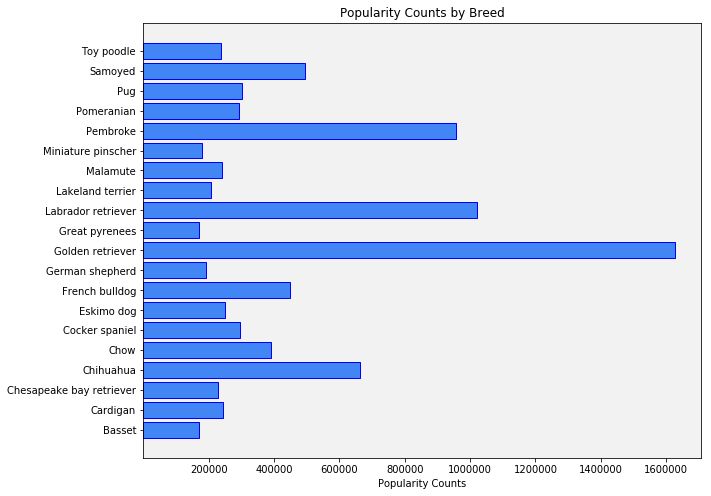

In [88]:
df_popular = df_all.groupby('p1')['favorite_count'].sum().reset_index()
df_sorted = df_popular.sort_values('favorite_count', ascending=False).head(20)
ser_pop = df_sorted['favorite_count']
ser_breed = df_sorted['p1']

fig, ax = plt.subplots(figsize=(10,8))
fav = plt.barh(ser_breed, ser_pop, color = "#4285F4", edgecolor = ['Blue']*len(ser_breed))
ax.set_facecolor('#F2F2F2')
plt.xlabel('Popularity Counts')
plt.title('Popularity Counts by Breed')
plt.xticks(np.arange(200000, 1800000, 200000))
plt.show();

##### Golden retriever is the most popular breed among the users with more than 1600000 likes, rank 2 breed is Labrador Retriever (about 1000000 likes) and Pembroke is rank 3 (slightly less than 1000000 likes).

#### 2. Dog Characteristics

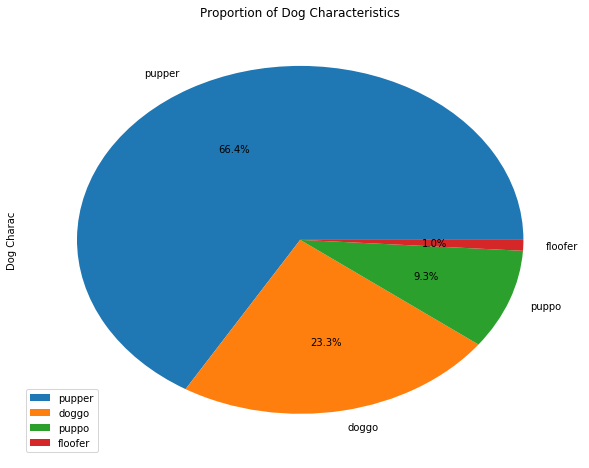

In [89]:
df_charac = df_all[df_all['dog_charac'] != "None"]
fig, ax = plt.subplots(figsize=(10,8))

df_charac['dog_charac'].value_counts().plot(kind = 'pie', ax = ax, label = 'Dog Charac', autopct='%1.1f%%')
plt.title('Proportion of Dog Characteristics')
plt.legend();

##### The most frequent dog chrarcteristic is "pupper" with about 66%, the second one is "doggo" (about 23%). The rest of two "puppo and floofer" with about 10% altogether.

#### 3. Rating

In [93]:
df_all['rating_scale_10'].value_counts()

12.00      558
11.00      464
10.00      461
13.00      351
9.00       158
8.00       102
7.00        55
14.00       54
5.00        35
6.00        32
3.00        19
4.00        17
2.00         9
1.00         9
0.00         2
420.00       2
9.75         2
15.00        2
960.00       1
84.00        1
24.00        1
17.00        1
13.50        1
143.00       1
121.00       1
80.00        1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
666.00       1
99.00        1
11.27        1
11.26        1
88.00        1
144.00       1
9.50         1
20.00        1
44.00        1
60.00        1
50.00        1
Name: rating_scale_10, dtype: int64

In [90]:
df_rate = df_all[df_all['rating_scale_10'] > 0]

In [91]:
rate_label = ['Good Dog (0.999, 9.0]', 'Awesome Dog (9.0, 10.0]', 'Great Dog (10.0, 11.0]', 'Excellent Dog (11.0, 12.0]', 'Perfect Dog (12.0, 13.0]', 'Unbelievable! (13.0, 1776.0]']

rate_bins = pd.qcut(df_rate['rating_scale_10'], 6, labels = rate_label)

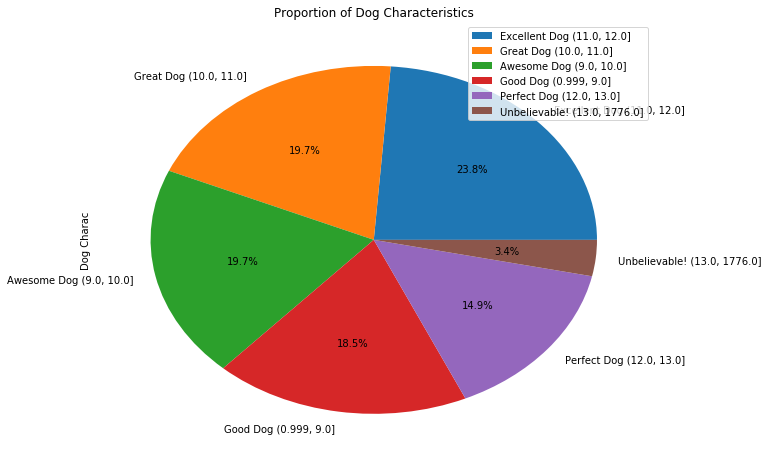

In [92]:
fig, ax = plt.subplots(figsize=(10,8))
rate_bins.value_counts().plot(kind = 'pie', ax = ax, label = 'Dog Charac', autopct='%1.1f%%')
plt.title('Proportion of Dog Characteristics')
plt.legend();

#### I analyzed the rating scale, and divided the score into different buckets with assigned names.
##### Good Dog:  0.999<x<=9.0, 
##### Awesome Dog: 9.0<x<=10.0, 
##### Great Dog: 10.0<x<=11.0, 
##### Excellent Dog 11.0<x<=12.0, 
##### Perfect Dog: 12.0<x<=13.0, 
##### Unbelievable!: 13.0<x<=1776.0 
#### According to the results, most of the dogs are rated between 0 and 13, only 3.4% of the dogs are rated higher than 13. It has outliers, such as 1176, 960, but still more than half the dogs have a rating greater than 10. Most popular rating is between 11 and 12.

#### 4. Favorite counts vs Retweet counts

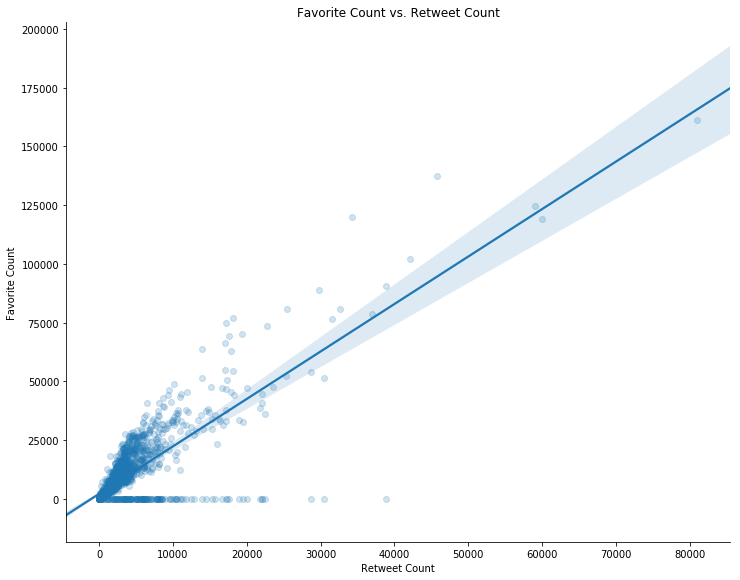

In [99]:
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=df_all,
           size = 8,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite Count vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

#### Favorite counts and retweet counts have a positive correlation. The majority of the data falls below 35000 favorite counts and 10000 retweet counts, so for every 3-4 favourites, there is about 1 retweets. 

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0